In [1]:
import pandas as pd
import math
import datetime
import seaborn as sns

In [4]:
import folium
from folium.plugins import MarkerCluster, HeatMap

ModuleNotFoundError: No module named 'folium'

In [5]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots import make_subplots

SyntaxError: invalid syntax (<ipython-input-5-f79f39d72032>, line 3)

In [ ]:
import geopandas

In [9]:
url='https://raw.githubusercontent.com/VinitaSilaparasetty/coursera-spatial-data-analysis/master/boston-crime%202.csv'
df = pd.read_csv(url)
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Date,Time
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13,09:28:24
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12,20:11:26
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12,15:12:43
3,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)",2019-10-12,04:41:52
4,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)",2019-10-02,08:08:49


In [10]:
#Create Base Map
boston=(42.358443,-71.05977)
m = folium.Map(location=boston,tile='Stamen terrain',zoom_start=12)
m

In [25]:
# Mark Crime Scenes
mc=MarkerCluster()
for index,row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.CircleMarker([row['Lat'], row['Long']]))
m.add_child(mc)

In [26]:
#View Districts with Highest Crime Rates
crime = df.groupby(['DISTRICT','STREET','REPORTING_AREA','Lat','Long']).sum().reset_index()

In [27]:
crime.update(crime['DISTRICT'].map('District:{}'.format))
crime.update(crime['REPORTING_AREA'].map('Reports:{}'.format))

In [33]:
m2 = folium.Map(location=boston, tiles='stamentoner', zoom_start=12)
HeatMap(data=crime[['Lat','Long']],radius=15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location=[point.Lat, point.Long],
                       radius=5,
                       weight=2,
                       popup=[point.DISTRICT, point.REPORTING_AREA],
                       fill_color='#000000').add_to(m2)
crime.apply(plotDot, axis=1)
m2.fit_bounds(m2.get_bounds())
m2

In [34]:
#Medical Assistance Analysis
med = df.loc[df.OFFENSE_CODE_GROUP=='Medical Assistance'][['Lat','Long']]
med.Lat.fillna(0,inplace=True)
med.Long.fillna(0,inplace=True)
m6=folium.Map(location=boston, tiles='openstreetmap', zoom_start=11)
HeatMap(data=med, radius=16).add_to(m6)
m6

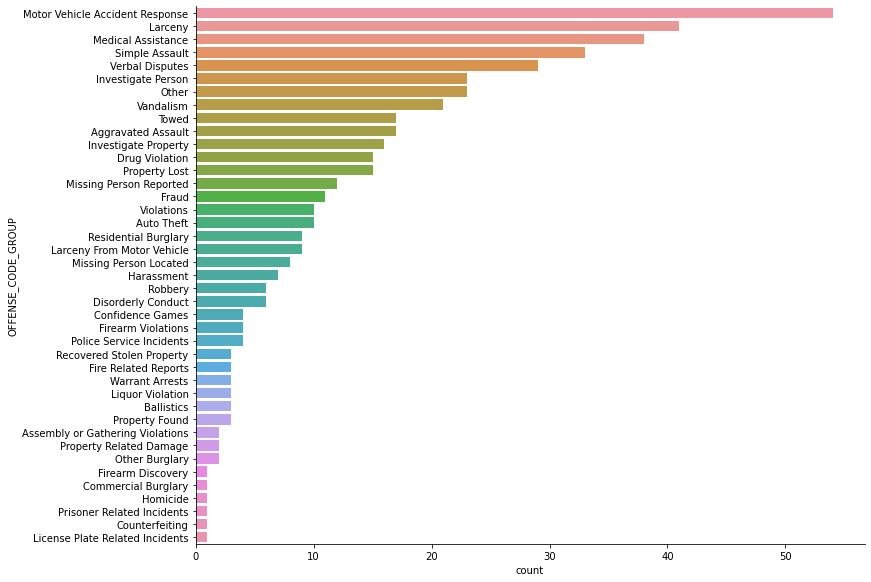

In [36]:
#Crimes Commited
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
           height=8,
           aspect=1.5,
           order=df.OFFENSE_CODE_GROUP.value_counts().index,
            data=df)

In [38]:
#Motor Vehicle Accident Response
mv=df.loc[df.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response'][['Lat','Long']]
mv.fillna(0,inplace=True)
mv.Lat.fillna(0,inplace=True)
mv.Long.fillna(0,inplace=True)
m4= folium.Map(location=boston, tiles='openstreetmap', zoom_start=11)
HeatMap(data=mv, radius=16).add_to(m4)
m4

In [39]:
#Larceny
mv=df.loc[df.OFFENSE_CODE_GROUP=='Larceny'][['Lat','Long']]
mv.fillna(0,inplace=True)
mv.Lat.fillna(0,inplace=True)
mv.Long.fillna(0,inplace=True)
m5= folium.Map(location=boston, tiles='openstreetmap', zoom_start=11)
HeatMap(data=mv, radius=16).add_to(m5)
m5

## How to Convert a Jupyter Notebook into a Dashboard
Note: So that you don't have to enter your personal details into the VM, this section of the project is a set of written instructions which you can try out on your personal system.

To create a dashboard like the one I created in the video, follow these steps:

1) Make a copy of the notebook that you receive after completing this project. Rename it 'covidmap'. (Or any other short name)

2) Remove all Markdown cells.

3) The only output that should be visible are the final choropleth map with markers and the final heatmap with markers. To prevent other outputs from being displayed, just add a semicolon at the end of the code and rerun the kernel.

4) To add a heading above the maps to indicate what they represent, just add a markdown cell above the cell containing the map output.

5) Save your notebook. Ensure that it is in the same directory as your jupyter lab installation.

6) Open the terminal and type in:

jupyter nbconvert boston-crime.ipynb --no-input --no-prompt

Note: If you named the copy of the notebook something else, replace that name where I have used 'boston-crime.ipynb'

7) You will now have a file named 'boston-crime.html'

## Uploading to Github
To share your shiny new dashboard with the world, follow these steps:

1. Change the name of the html file to 'index.html'
2. create a github repository and ensure that you initialize it with a read.me file.
3. Once the repository is ready, rename the dashboard to 'index.html'. If you name it anything else, it will not show up.
4. Once the dashboard is successfully uploaded, remove all content from the read.me file.(Do not delete the file, it just needs to be empty)
5. Go to settings of your repository and enable github pages.
6. Visit the link of the newly created gihub page and your dashboard should appear!